1.MSSV: 19522351

2.Họ tên: Trần Trung Tín

3.Bài tập: 4

#Kết nối đến google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
dir_monhoc = '/content/drive/MyDrive/CS231.M12.KHCL'
dir_baitap = os.path.join(dir_monhoc, 'Baitap', 'Baitap4')
dir_images = os.path.join(dir_baitap, 'images')

#Khai báo thư viện

In [ ]:
import cv2 as cv
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import numpy as np
from scipy import ndimage
from scipy.spatial import distance
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift, estimate_bandwidth

#Thực hành 1: Phân đoạn ảnh

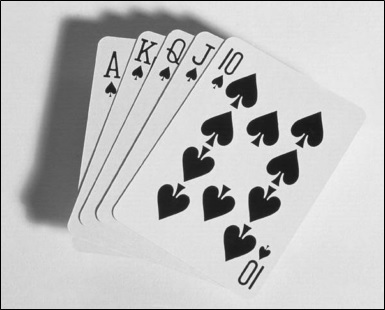

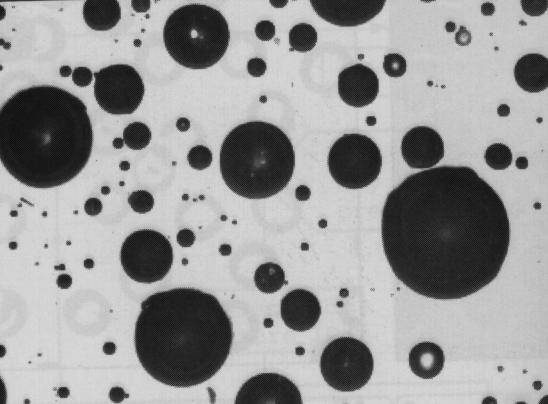

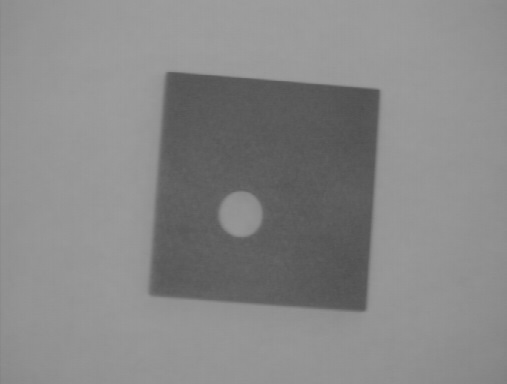

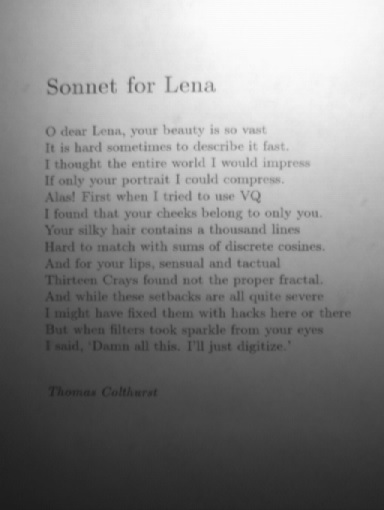

In [ ]:
path_Phandoan01 = os.path.join(dir_images, 'Phandoan01.jpg')
img1 = cv.imread(path_Phandoan01, 0)
cv2_imshow(img1)
path_particles = os.path.join(dir_images, 'particles.bmp')
img2 = cv.imread(path_particles, 0)
cv2_imshow(img2)
path_wdg2 = os.path.join(dir_images, 'wdg2.jpg')
img3 = cv.imread(path_wdg2, 0)
cv2_imshow(img3)
path_son1 = os.path.join(dir_images, 'son1.jpg')
img4 = cv.imread(path_son1, 0)
cv2_imshow(img4)

##Vẽ Histogram

In [ ]:
def drawHis(x):
  hist = cv.calcHist([x], [0], None, [256], [0, 256])
  plt.plot(hist)
  plt.xlim([0, 256])
  plt.legend(('histogram'), loc = 'upper left')
  plt.show()

Phandoan01: 


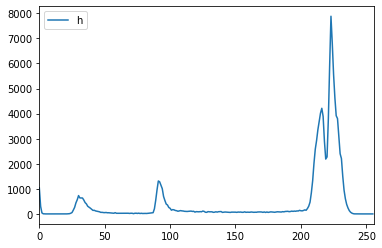

particles: 


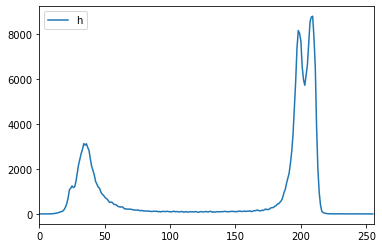

wdg2: 


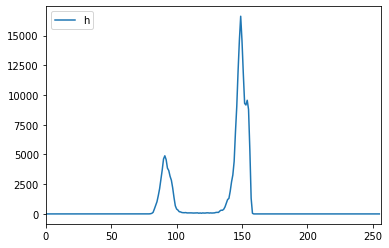

son1: 


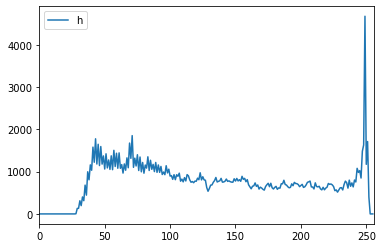

In [ ]:
print('Phandoan01: ')
drawHis(img1)
print('particles: ')
drawHis(img2)
print('wdg2: ')
drawHis(img3)
print('son1: ')
drawHis(img4)

##Phân đoạn ảnh

In [ ]:
def AdaptiveSeg(f, nrow, ncol):
  g = f.copy()
  r = int(f.shape[0] / nrow)
  c = int(f.shape[1] / ncol)
  for i in range(int(nrow)):
    for j in range(int(ncol)):
      x = f[i * r : (i + 1) * r, j * c : (j + 1) * c]
      cv2_imshow(x)
      drawHis(x)
      t = int(input())
      g[i * r : (i + 1) * r, j * c : (j + 1) * c] = Segmentation(x, t)
  return g

In [ ]:
def Segmentation(f, T):
  g = f.copy()
  for i in range(f.shape[0]):
    for j in range(f.shape[1]):
      g[i, j] = 255 if int(f[i, j]) > int(T) else 0
  return g

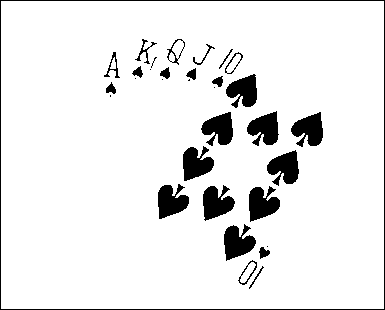

In [ ]:
Phandoan01 = Segmentation(img1, 80)
cv2_imshow(Phandoan01)

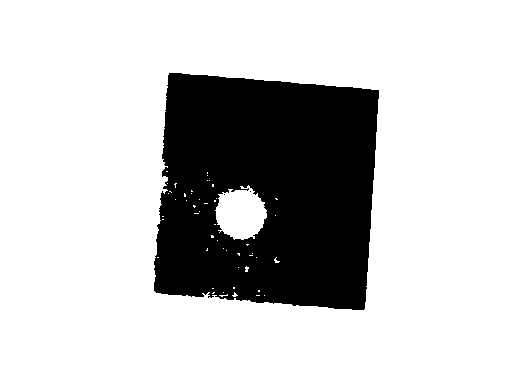

In [ ]:
wdg2 = Segmentation(img3, 99)
cv2_imshow(wdg2)

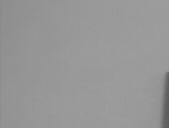

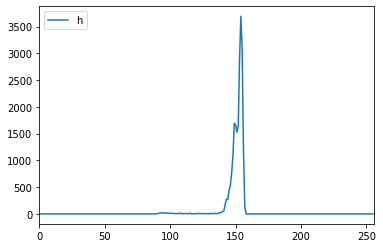

135


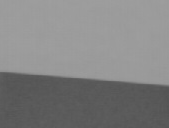

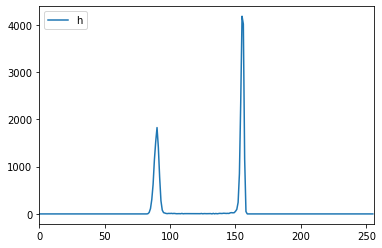

130


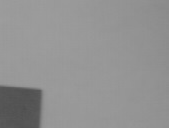

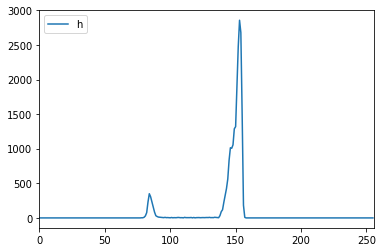

140


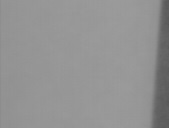

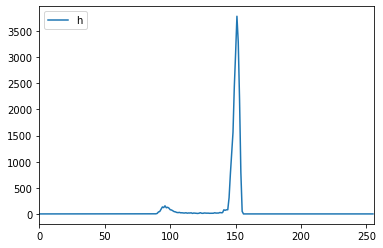

145


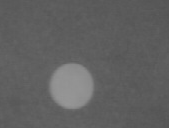

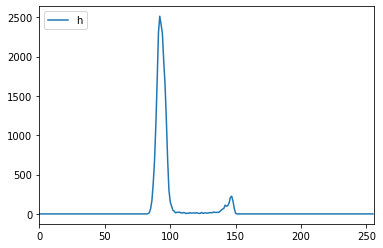

130


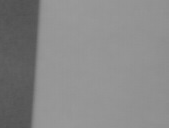

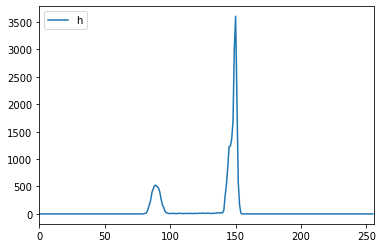

135


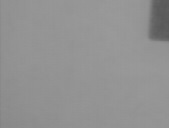

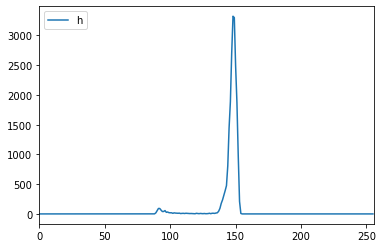

150


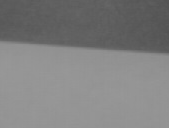

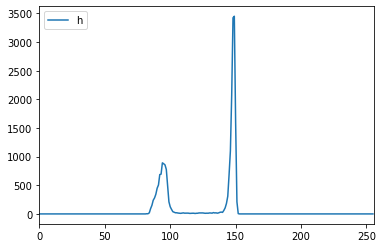

135


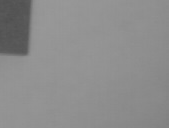

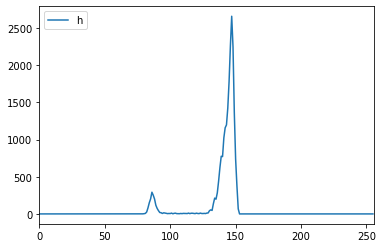

140


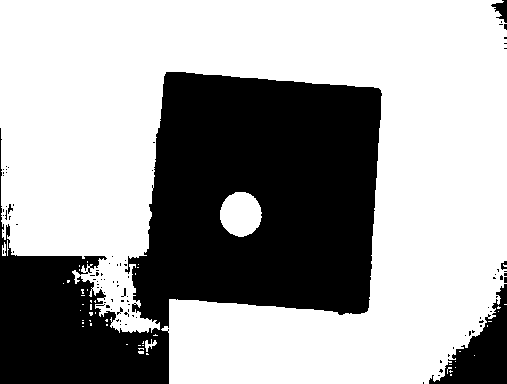

In [ ]:
wdg2 = AdaptiveSeg(img3, 3, 3)
cv2_imshow(wdg2)

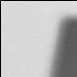

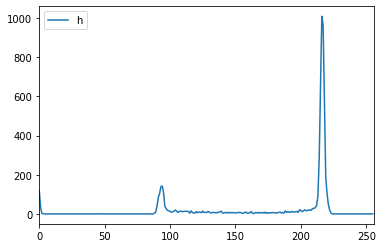

150


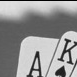

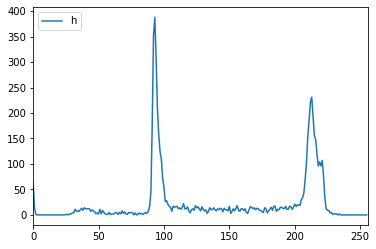

190


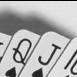

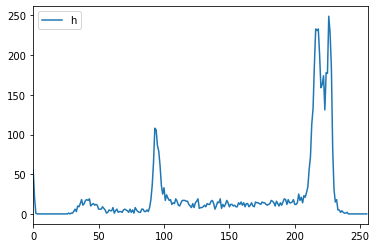

220


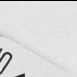

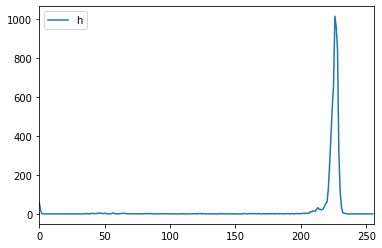

200


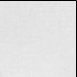

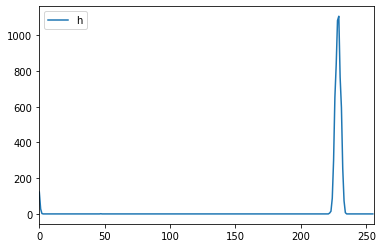

140


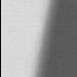

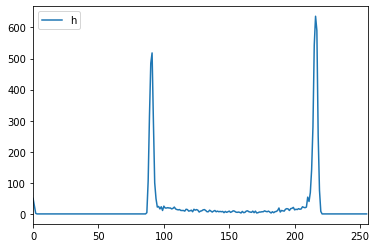

210


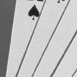

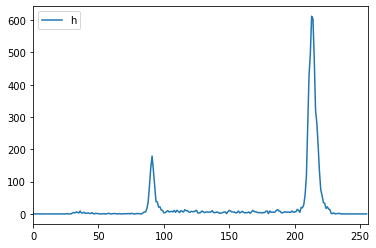

200


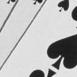

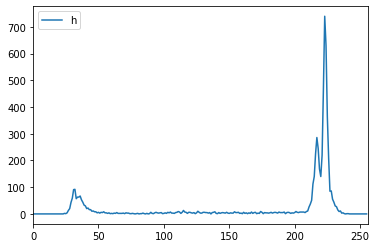

195


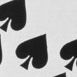

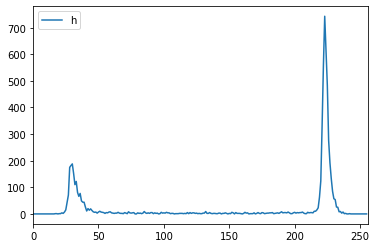

100


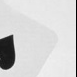

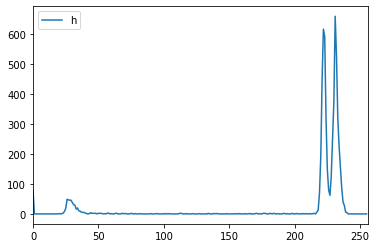

50


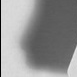

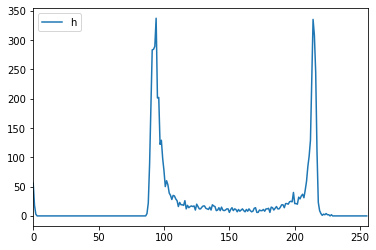

90


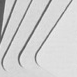

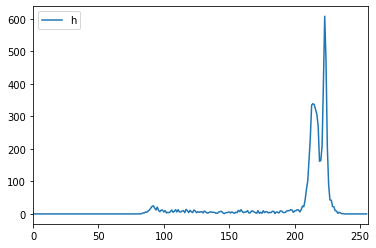

120


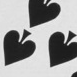

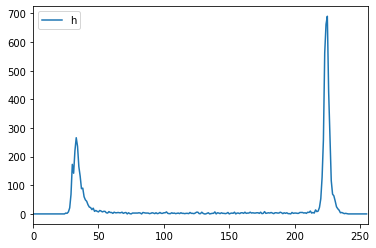

165


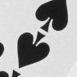

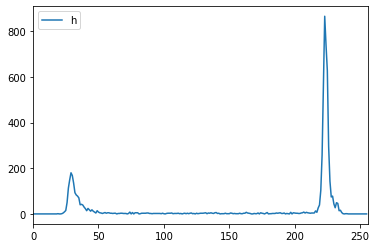

250


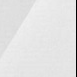

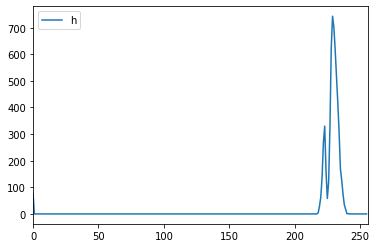

75


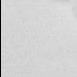

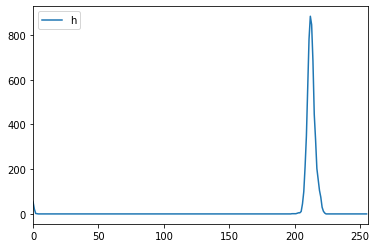

40


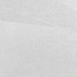

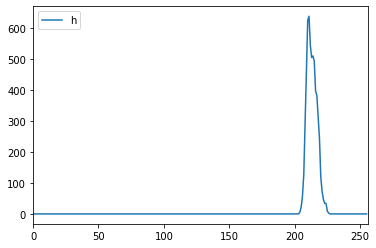

60


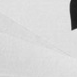

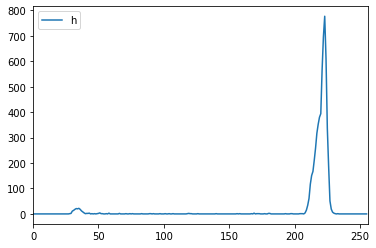

80


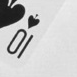

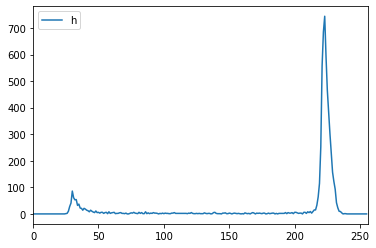

30


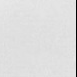

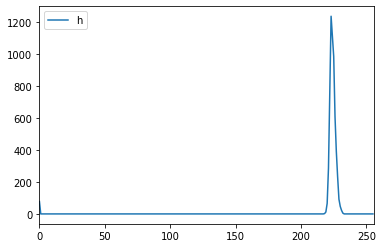

170


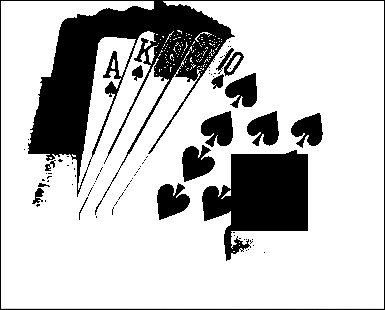

In [ ]:
Phandoan01_ = AdaptiveSeg(img1, 4, 5)
cv2_imshow(Phandoan01_)

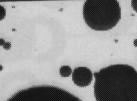

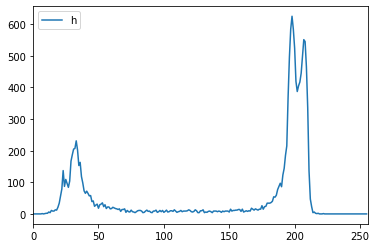

100


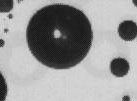

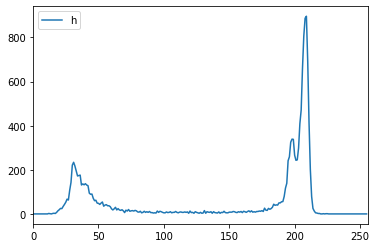

125


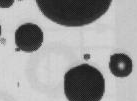

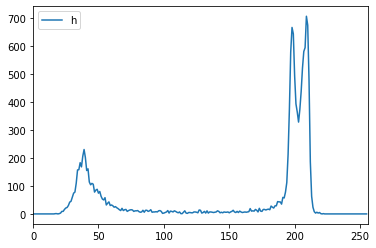

130


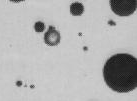

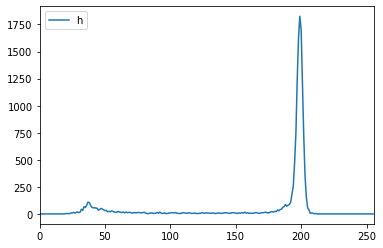

110


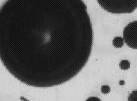

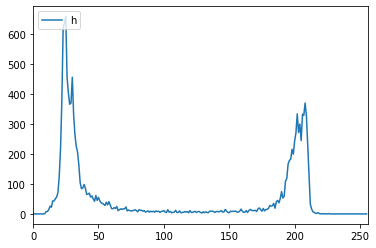

100


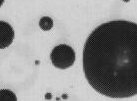

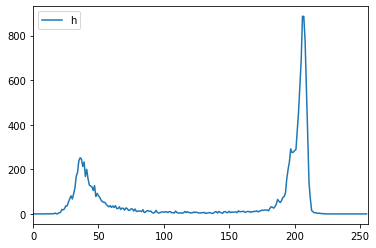

105


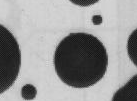

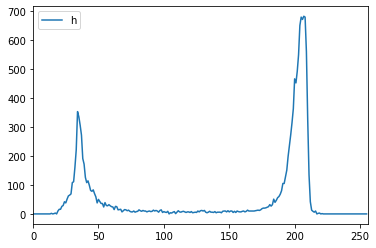

115


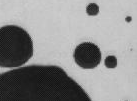

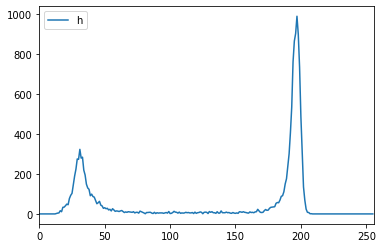

125


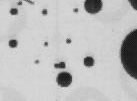

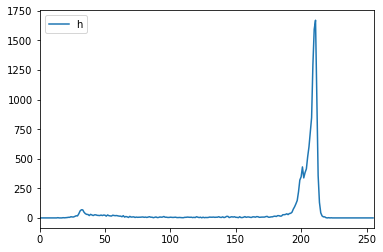

135


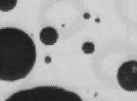

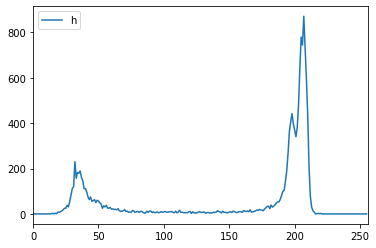

145


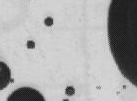

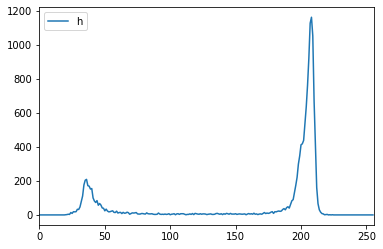

125


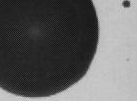

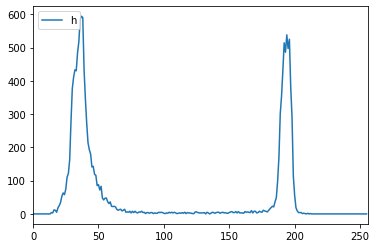

130


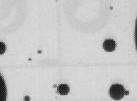

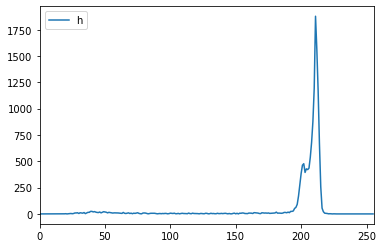

125


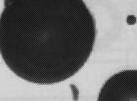

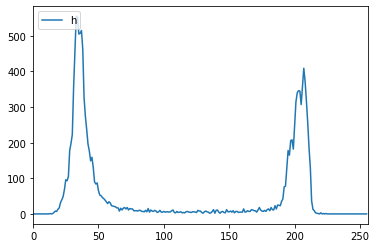

115


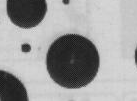

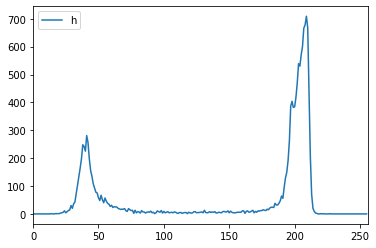

135


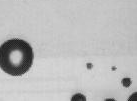

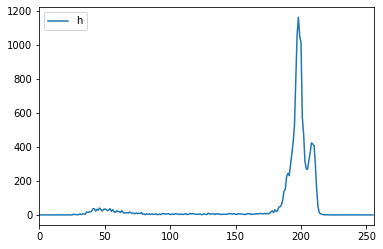

105


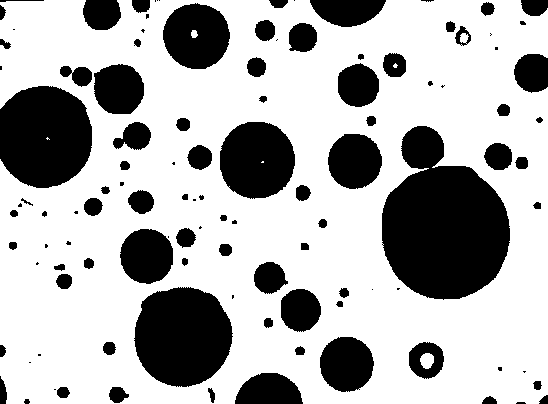

In [ ]:
particles = AdaptiveSeg(img2, 4, 4)
cv2_imshow(particles)

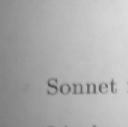

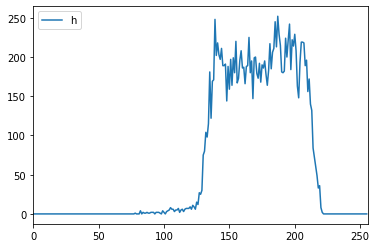

155


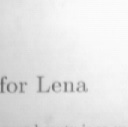

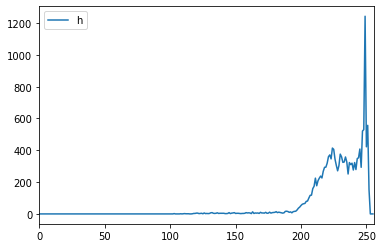

115


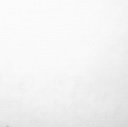

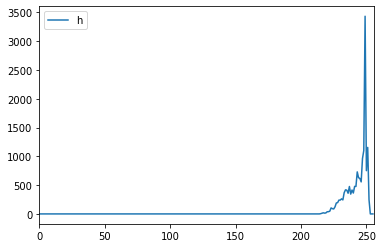

105


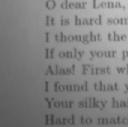

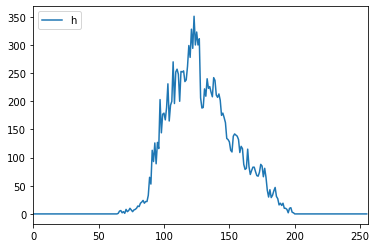

100


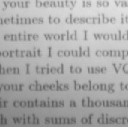

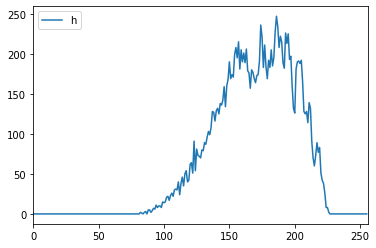

125


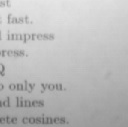

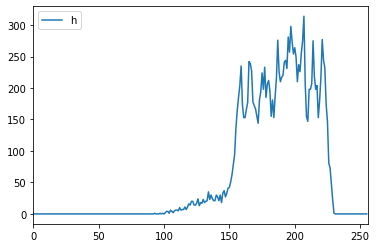

110


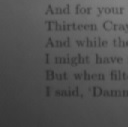

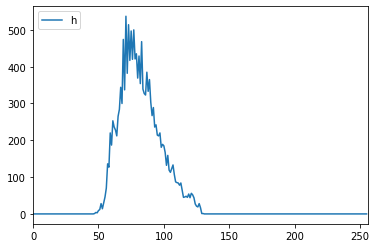

65


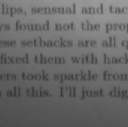

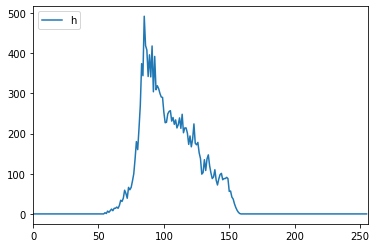

75


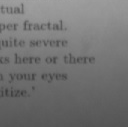

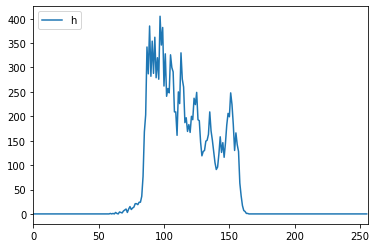

90


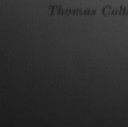

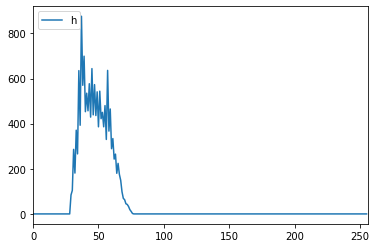

80


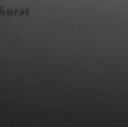

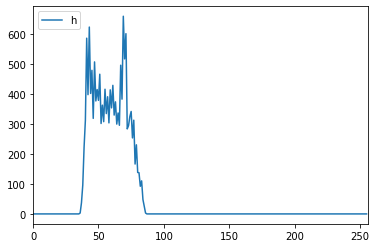

70


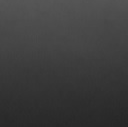

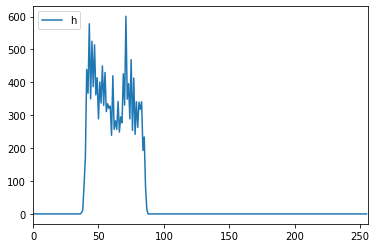

75


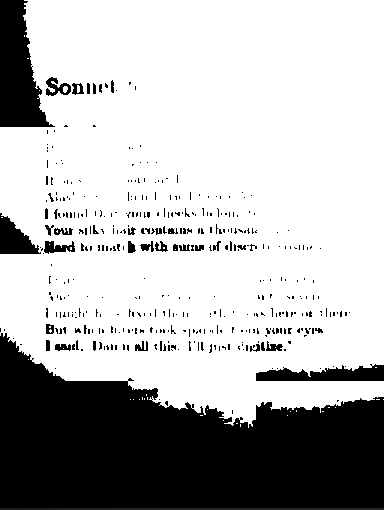

In [ ]:
son1 = AdaptiveSeg(img4, 4, 3)
cv2_imshow(son1)

#Yêu cầu 2: K-means

##Representing each pixel as (r,g,b)

In [ ]:
path_vegetables = os.path.join(dir_images, 'vegetables.jpg')
img5 = cv.imread(path_vegetables)

path_hand = os.path.join(dir_images, 'hand.jpg')
img6 = cv.imread(path_hand)

path_thuoc = os.path.join(dir_images, 'thuoc.jpg')
img7 = cv.imread(path_thuoc)

path_dogcat = os.path.join(dir_images, 'dogcat.jpg')
img8 = cv.imread(path_dogcat)

In [ ]:
def kmeans(img_src, n_clusters):
    img = img_src.copy()
    cv2_imshow(img)
    nrow, ncol, nchl = img.shape
    g = img.reshape(nrow*ncol,nchl)
    k_means = KMeans(n_clusters = n_clusters, random_state = 0).fit(g)
    t = k_means.cluster_centers_[k_means.labels_]
    img_res = t.reshape(nrow, ncol, nchl)
    cv2_imshow(img_res)

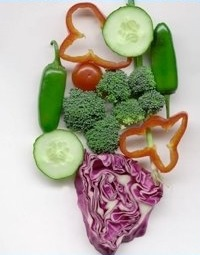

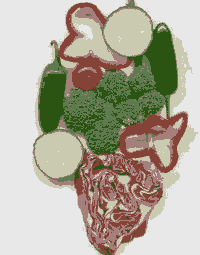

In [ ]:
kmeans(img5, 6)

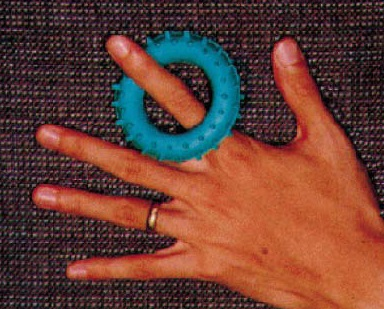

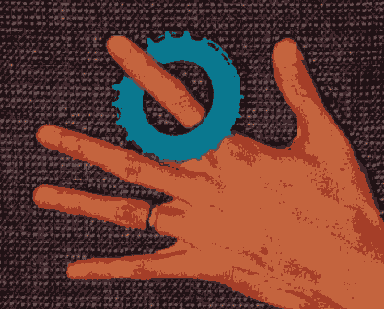

In [ ]:
kmeans(img6, 6)

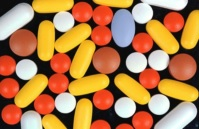

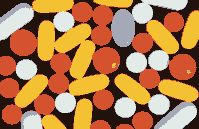

In [ ]:
kmeans(img7, 5)

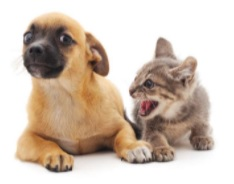

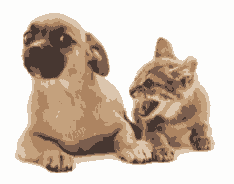

In [ ]:
kmeans(img8, 6)

##Represent each pixel as (r,g,b,x,y)

In [ ]:
def Kmeans2(img_src, n_clusters):
    img = img_src.copy()
    cv2_imshow(img)
    nrow, ncol, nchl = img.shape
    g = []
    for y in range(nrow):
        for x in range(ncol):
            temp = [img[y, x][0], img[y, x][1], img[y, x][2], x, y]
            g.append(temp)
    k_means = KMeans(n_clusters = n_clusters, random_state = 0).fit(g)
    # t = k_means.cluster_centers_[k_means.labels_]
    arrcolors = np.random.rand(15, 3) * 255
    t = arrcolors[k_means.labels_]

    img_res = img
    i = 0
    for y in range(nrow):
        for x in range(ncol):
            img_res[y][x] = t[i][0:3]
            i = i+1
    cv2_imshow(img_res)

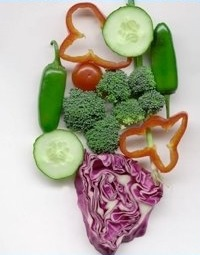

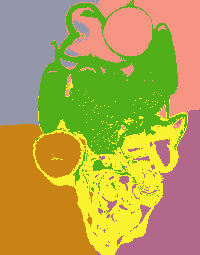

In [ ]:
Kmeans2(img5, 6)

#18/10/2021: 

##Yêu cầu 3: meanshift

###Representing each pixel as (r,g,b)

In [ ]:
def meanshift(img_src, n_clusters):
  img = img_src.copy()
  cv2_imshow(img)
  nrow, ncol, nchl = img.shape
  g = img.reshape(nrow*ncol, nchl)
  bandwidth = estimate_bandwidth(g, quantile=0.2, n_samples=500)
  ms = MeanShift(bandwidth=bandwidth, bin_seeding=True).fit(g)
  t = ms.cluster_centers_[ms.labels_]
  img_res = t.reshape(nrow, ncol, nchl)
  cv2_imshow(img_res)

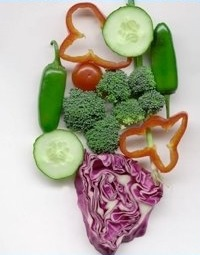

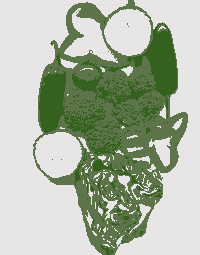

In [ ]:
meanshift(img5, 6)

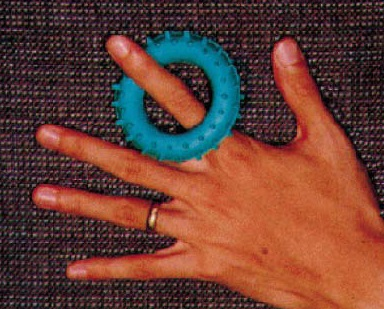

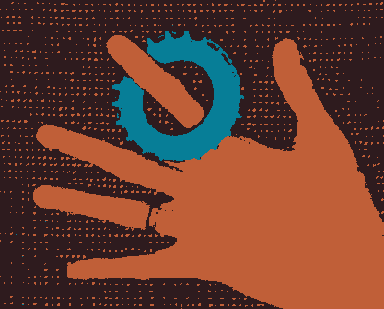

In [ ]:
meanshift(img6, 6)

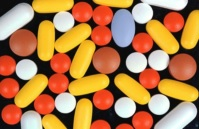

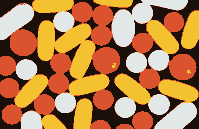

In [ ]:
meanshift(img7, 6)

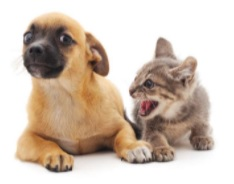

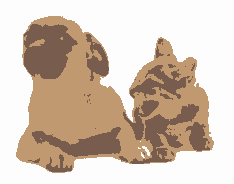

In [ ]:
meanshift(img8, 6)

###Represent each pixel as (r,g,b,x,y)

In [ ]:
def meanshift2(img_src, n_clusters):
  img = img_src.copy()
  cv2_imshow(img)
  nrow, ncol, nchl = img.shape
  g = []
  for y in range(nrow):
    for x in range(ncol):
      temp = [img[y, x][0], img[y, x][1], img[y, x][2], x, y]
      g.append(temp)
  bandwidth = estimate_bandwidth(g, quantile=0.2, n_samples=500)
  ms = MeanShift(bandwidth=bandwidth, bin_seeding=True).fit(g)
  arrcolors = np.random.rand(15, 3) * 255
  t = arrcolors[ms.labels_]
  img_res = img
  i = 0
  for y in range(nrow):
    for x in range(ncol):
      img_res[y][x] = t[i][0:3]
      i = i+1
  cv2_imshow(img_res)

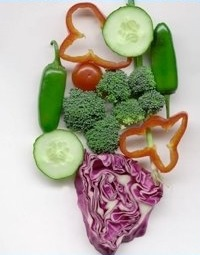

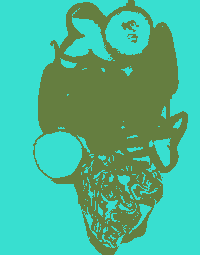

In [ ]:
meanshift2(img5, 6)

##Yêu cầu 4: Fuzzy C-mean

In [ ]:
pip install scikit-fuzzy

In [ ]:
pip install fuzzy-c-means

In [ ]:
from fcmeans import FCM

In [ ]:
def fc_means(img_src, n_clusters):
    img = img_src.copy()
    cv2_imshow(img)
    nrow, ncol, nchl = img.shape
    g = img.reshape(nrow*ncol,nchl)
    fcm = FCM(n_clusters=n_clusters)
    fcm.fit(g)
    fcm_labels = fcm.predict(g)
    t = fcm.centers[fcm_labels]

    img_res = t.reshape(nrow, ncol, nchl)
    cv2_imshow(img_res)

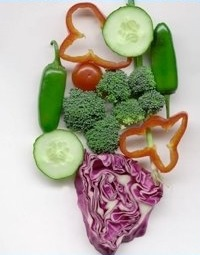

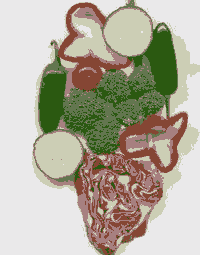

In [ ]:
fc_means(img5, 6)